# Nom

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
mpl.rcParams.update(rcParams)
mpl.rcParams['lines.markersize'] = 9

In [2]:
data = pd.read_csv("../data/calibration.csv")

In [3]:
data

,I [A],B [mT],deltaI,deltaB
0,6.070,366.00,0.01,6.6600
1,5.340,354.00,0.01,6.5400
2,4.470,335.00,0.01,6.3500
3,3.560,309.00,0.01,6.0900
4,3.050,248.80,0.01,2.7880
5,2.660,253.00,0.01,2.8300
6,2.040,208.30,0.01,2.3830
7,1.250,131.70,0.01,1.6170
8,0.700,76.50,0.01,1.0650
9,0.000,0.38,0.01,0.0338


In [4]:
I = unp.uarray(data["I [A]"], data["deltaI"])
B = unp.uarray(data["B [mT]"], data["deltaB"])

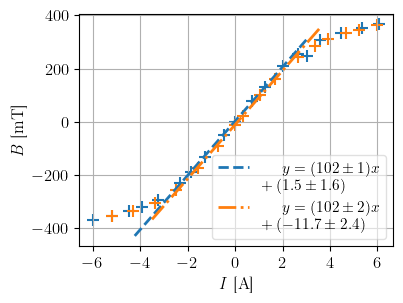

In [5]:
plt.scatter(unp.nominal_values(I)[:19], unp.nominal_values(B)[:19])
plt.scatter(unp.nominal_values(I)[19:], unp.nominal_values(B)[19:])
# plt.errorbar(unp.nominal_values(I), unp.nominal_values(B), xerr=unp.std_devs(I), yerr=unp.std_devs(B), linestyle='None')

# Fit
start, stop = 6, 14
coefs, cov = np.polyfit(unp.nominal_values(I)[start:stop], unp.nominal_values(B)[start:stop], 1, cov=True)
fit = np.poly1d(coefs)
coefserr = unp.uarray(coefs, np.sqrt(cov[(0,1),(0,1)]))
x = np.linspace(I[stop].n - 1, I[start].n + 1, 100)
plt.plot(x, fit(x), '--', label=r"$y = ({:.1uL})x \\+ ({:.2uL})$".format(*coefserr), color='tab:blue', linewidth=2)

start, stop = 22, 29
coefs, cov = np.polyfit(unp.nominal_values(I)[start:stop], unp.nominal_values(B)[start:stop], 1, cov=True)
fit = np.poly1d(coefs)
coefserr = unp.uarray(coefs, np.sqrt(cov[(0,1),(0,1)]))
x = np.linspace(I[start].n - 1, I[stop].n + 1, 100)
plt.plot(x, fit(x), '-.', label=r"$y = ({:.1uL})x \\+ ({:.2uL})$".format(*coefserr), color='tab:orange', linewidth=2)

plt.xticks(np.arange(-6, 7, 2))
plt.xlabel(r"$I$ [\si{\ampere}]")
plt.ylabel(r"$B$ [\si{\milli\tesla}]")

plt.legend(loc='best', framealpha=0.6)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.4))
plt.grid()
plt.tight_layout(pad=0.5)
plt.savefig("../figures/calibration.pdf")